In [21]:
# import libraries
import sys
import os
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import psycopg2
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix
from functools import reduce
# Display options for pandas
pd.options.display.max_columns = 50
from glob import glob
pd.options.display.max_rows = 3000

import statsbombpy
from statsbombpy import sb
import pandas as pd
import feather
min_max_scaler = MinMaxScaler()  # could also test using the StandardScaler()

from sklearn.cluster import MiniBatchKMeans

from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture

In [7]:
conn_string = "dbname='dbp90instance' port='3306' user='sr_user1' password='vigdata35' host='dbp90instance.cxanumxnk9py.eu-west-3.rds.amazonaws.com'"  

connection = psycopg2.connect(conn_string);

# A function that takes in a PostgreSQL query and outputs a pandas database 
def create_pandas_table(sql_query, database = connection):
    table = pd.read_sql_query(sql_query, database)
    return table

# Utilize the create_pandas_table function to create a Pandas data frame
# Store the data as a variable
tech_info = create_pandas_table("SELECT * from player_season_stats")


In [38]:
conn_string = "dbname='dbp90instance' port='3306' user='sr_user1' password='vigdata35' host='dbp90instance.cxanumxnk9py.eu-west-3.rds.amazonaws.com'"  

connection = psycopg2.connect(conn_string);

# A function that takes in a PostgreSQL query and outputs a pandas database 
def create_pandas_table(sql_query, database = connection):
    table = pd.read_sql_query(sql_query, database)
    return table

# Utilize the create_pandas_table function to create a Pandas data frame
# Store the data as a variable
tech_info_x = create_pandas_table("SELECT * from player_match_data_main")


In [37]:
check = tech_info.filter(regex='country')
print(check.columns)

Index(['country_id'], dtype='object')


In [189]:
# Select comps and Season names #
seasons=check[['Season','League']].reset_index(drop=True)
seasons.drop_duplicates(subset =['League'],keep = 'first', inplace = True)
seasons=seasons.reset_index(drop=True)
seasons['Combo']=seasons['League']+'_'+seasons['Season']
seasons['Combo']=seasons['Combo'].str.replace("/", '_')
seasons['Combo']=seasons['Combo'].str.replace("-", '_')
seasons['Combo']=seasons['Combo'].str.replace(" ", '_')
seasons['Combo']=seasons['Combo'].str.replace("___", '_')
seasons['Combo']=seasons['Combo'].str.replace("\xa0", '_')
len(seasons)

55

In [190]:
All_seasons=list(seasons.Combo.unique())
Attack_actions1=Attack_actions[0:4]
len(All_seasons)

55

In [204]:
folder="/Users/vignesh.jayanth/Documents/event_data_16Jan22/"
subfolders = [f.path for f in os.scandir(folder) if f.is_dir()]
subfolders = [i.split('/')[-1] for i in subfolders] 
subnames = [i.split('_')[-1] for i in subfolders] 
subnames = [x[:-1] for x in subnames]

Defensive_actions=['blocks','clearances','interceptions','foul_committeds','duels']

Attack_actions=['passes','carrys','dribbles','shots']

main_list = Attack_actions + Defensive_actions
remaining_list = list(set(subfolders) - set(main_list))
remaining_list

['injury_stoppages',
 'shields',
 'player_ons',
 'half_starts',
 'miscontrols',
 'substitutions',
 'pressures',
 'bad_behaviours',
 'foul_wons',
 'dribbled_pasts',
 'own_goal_againsts',
 'errors',
 'player_offs',
 'tactical_shifts',
 'dispossesseds',
 'goal_keepers',
 'starting_xis',
 'own_goal_fors',
 'ball_recoverys',
 'referee_ball_drops',
 'offsides',
 'half_ends',
 '50_50s',
 'ball_receipts']

In [257]:
# Attack actions #

# Check for Pass #

Attack_actions1=Attack_actions[0:1]
Attack_actions1

['passes']

In [259]:
from itertools import combinations
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import itertools

A=[]

for i in Attack_actions1:
    
    path = '/Users/vignesh.jayanth/Documents/event_data_16Jan22/'+str(i) # use your path

    for k in All_seasons:

        all_files = glob(path + "/*.ftr")

        indices = [i for i, s in enumerate(all_files) if k in s]

        L.append(indices)

    all_indices=list(set(itertools.chain(*L)))

    for j in all_indices:

        path = '/Users/vignesh.jayanth/Documents/event_data_16Jan22/'+str(i) # use your path

        allj_files = glob(path + "/*.ftr")

        filename=allj_files[j:j+1]
        # Read the files from each action #
        df = pd.read_feather(filename[0])
        # Make the minimum transformation #
        df=transform_dt(df)
        dfx=attack_action(df).fillna(0)
        A.append(dfx)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
scaler = MinMaxScaler()

A1=pd.concat(A).fillna(0)

In [266]:
X=A1.head(50000)
X_scaled=scaler.fit_transform(X)

In [268]:

print(len(A1))
print(len(X_scaled))

8371877
50000


In [272]:
#K means Clustering

#One major factor to consider in K-means clustering is the number of clusters the final grouping should have.
#One method to determine this is via the 'elbow method'. 
##Essentially plotting number of clusters against the sum of squared errors. 
### A good number of clusters to choose is at the plot's "elbow" - the point where adding another cluster 
## doesn't reduce the sum of squared errors too much. 
#It gives a fairly good approximation but is not foolproof, so knowledge of the data helps with this too

cluster_range = range(1, 25)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(X_scaled)
    cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors })

#Plotting the number of clusters using the elbow method

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()


KeyboardInterrupt: 

In [ ]:

# Silhouette Score #- High Score Better

km_silhouette_df=pd.DataFrame(km_silhouette).reset_index().set_axis(['clusters','silhouette_score'], axis=1, inplace=False)
km_silhouette_df['clusters']=km_silhouette_df['clusters']+2
km_silhouette_df=km_silhouette_df.sort_values(by=['silhouette_score'], ascending=[False]).reset_index(drop=True)

silhouette_score=km_silhouette_df.head(5)
silhouette_clusters=silhouette_score.clusters.to_list()

# DB Score #- Lower Score Better

db_score_df=pd.DataFrame(db_score).reset_index().set_axis(['clusters','db_score'], axis=1, inplace=False)
db_score_df['clusters']=db_score_df['clusters']+2
db_score_df=db_score_df.sort_values(by=['db_score'], ascending=[True]).reset_index(drop=True)
db_score_df_score=db_score_df.head(5)
db_score_df_clusters=db_score_df_score.clusters.to_list()

# KM Score #- When Subsequent Error difference stabilises

km_scores_df=pd.DataFrame(km_scores).reset_index().set_axis(['clusters','cluster_errors'], axis=1, inplace=False)
km_scores_df['delta']=((km_scores_df['cluster_errors'].shift(1)-km_scores_df['cluster_errors'])/km_scores_df['cluster_errors'].shift(1)).fillna(0)*100
km_scores_df['delta1']=(km_scores_df['delta'].shift(1)-km_scores_df['delta']).fillna(0)
km_scores_df['strength']=(km_scores_df['delta1'].shift(1)-km_scores_df['delta1'])/km_scores_df['delta1']
km_scores_df= km_scores_df[km_scores_df['strength'] != 0]
km_scores_df.replace([np.inf, -np.inf], np.nan, inplace=True)
km_scores_df=km_scores_df.sort_values(by=['strength'], ascending=[False]).reset_index(drop=True)
km_scores_df_score=km_scores_df.head(5)
km_scores_clusters=km_scores_df_score.clusters.to_list()

# Common Clusters between two criterion #

#common_clusters=list(set(silhouette_clusters).intersection(db_score_df_clusters))
common_clusters=sorted(list(set(db_score_df_clusters).intersection(km_scores_clusters)))
common_clusters=common_clusters[0:1]
common_clusters


In [ ]:
list_of_cbs=pd.read_excel('/Users/vignesh.jayanth/Documents/CB Folder/Center Backs.xlsx')
players_cb=list(list_of_cbs.Players.unique())

print(len(players_cb))

benchmark_cbs=['Nayef Aguerd','Loïc Badé','Warmed Omari','Ibrahima Konaté','Fikayo Tomori',
               'Rúben Santos Gato Alves Dias','Virgil van Dijk','Sven Botman']

Final_CBs=benchmark_cbs+players_cb

check=tech_info_x[(tech_info_x['Player_SB'].isin(Final_CBs)) & 
               (tech_info_x['Season']>='2021')][['Team','Season','League','Player_SB','player_id']].reset_index(drop=True)

remove=[155513,10065,12125,26675,48830,49883,56550,24166,28272,122981]

check=check[~check['player_id'].isin(remove)]

df = check.groupby(['Player_SB','Team','player_id']).size().reset_index(name='Freq')
df.drop_duplicates(subset =['Player_SB','player_id'],keep = 'first', inplace = True)
df=df.reset_index(drop=True)

players_check=list(df.Player_SB.unique())
players_ids=list(df.player_id.unique())

print(len(players_check))
print(len(players_ids))

In [407]:
# All the Leagues - Attack #

D=[]
F=[]
G=[]
L=[]

Attack_clusters = {'Pass': 25, 'Carry': 5, 'Dribble': 6, 'Shot':10}

for i in Attack_actions:
    
    path = '/Users/vignesh.jayanth/Documents/event_data_16Jan22/'+str(i) # use your path
    
    for k in All_seasons:
        
        all_files = glob(path + "/*.ftr")
    
        indices = [i for i, s in enumerate(all_files) if k in s]
        
        L.append(indices)
        
    all_indices=list(set(itertools.chain(*L)))
    
    for j in all_indices:

        path = '/Users/vignesh.jayanth/Documents/event_data_16Jan22/'+str(i) # use your path

        allj_files = glob(path + "/*.ftr")

        filename=allj_files[j:j+1]

        # Read the files from each action #
        df = pd.read_feather(filename[0])
        # Make the minimum transformation #
        df=transform_dt(df)
        dfx=attack_action(df).fillna(0)     
        D.append(dfx)
        
lst1 = list(range(0,len(D),len(all_indices)))

for g in lst1:

    df_final = pd.concat(D[g:g+len(all_indices)]).fillna(0)

    G_1=df_final.reset_index()
    
    i=G_1['type'].unique()[0]

    cluster1=kmeans(df_final,str(i)+'_clusters',Attack_clusters[i])

    cluster=pd.DataFrame(cluster1.groupby(['season_name','team','player','player_id', str(i)+'_clusters']).size().unstack(fill_value=0))
    cluster = cluster.add_prefix(str(i)+'_cluster_')
    
    cols = list(df_final.filter(regex='obv|clusters|End_|Start_').columns)

    df_final=df_final[cols].reset_index()

    F.append(cluster) # This is no. of cluster interactions matrix #
    G.append(df_final) # This is for all features Statistics and clusters choose G[-1] #


In [401]:
# All the Leagues - Defense #

A=[]
B=[]
K=[]
M=[]

Defense_clusters = {'Block': 6, 'Clearance': 5, 'Interception': 6, 'Pressure':10,
                   'Foul Committed': 6, 'Dribbled Past': 5, 'Ball Recovery': 6,
                    'Dispossessed':10,'50/50':5,'Duel':6}

for i in Defensive_actions:
    
    path = '/Users/vignesh.jayanth/Documents/event_data_16Jan22/'+str(i) # use your path
    
    for k in All_seasons:
        
        all_files = glob(path + "/*.ftr")
    
        indices = [i for i, s in enumerate(all_files) if k in s]
        
        M.append(indices)
        
    all_indices=list(set(itertools.chain(*M)))
    
    for j in all_indices:

        path = '/Users/vignesh.jayanth/Documents/event_data_16Jan22/'+str(i) # use your path

        allj_files = glob(path + "/*.ftr")

        filename=allj_files[j:j+1]

        # Read the files from each action #
        df = pd.read_feather(filename[0])
        # Make the minimum transformation #
        df=transform_dt(df)
        dfx=attack_action(df).fillna(0)     
        A.append(dfx)
        
lst1 = list(range(0,len(A),len(all_indices)))

for g in lst1:

    df_final = pd.concat(A[g:g+len(all_indices)]).fillna(0)

    G_1=df_final.reset_index()
    
    i=G_1['type'].unique()[0]

    cluster1=kmeans(df_final,str(i)+'_clusters',Defense_clusters[i])

    cluster=pd.DataFrame(cluster1.groupby(['season_name','team','player','player_id', str(i)+'_clusters']).size().unstack(fill_value=0))
    cluster = cluster.add_prefix(str(i)+'_cluster_')
    
    cols = list(df_final.filter(regex='obv|clusters|End_|Start_').columns)

    df_final=df_final[cols].reset_index()

    B.append(cluster) # This is no. of cluster interactions matrix #
    K.append(df_final) # This is for all features Statistics and clusters choose G[-1] #


In [3]:
import psycopg2
import pandas as pd

conn_string = "dbname='dbp90instance' port='3306' user='sr_user1' password='vigdata35' host='dbp90instance.cxanumxnk9py.eu-west-3.rds.amazonaws.com'"  

connection = psycopg2.connect(conn_string);

# A function that takes in a PostgreSQL query and outputs a pandas database 
def create_pandas_table(sql_query, database = connection):
    table = pd.read_sql_query(sql_query, database)
    return table

# Utilize the create_pandas_table function to create a Pandas data frame
# Store the data as a variable
tech_info_x = create_pandas_table("SELECT * from player_season_stats")


/Users/vignesh.jayanth/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [2]:
Season_stats=tech_info_x[['Player_SB','player_id','preferred_foot','primary_position','birth_date','secondary_position','Season','player_height']].reset_index(drop=True)
Season_stats=Season_stats.rename(columns={'Player_SB':'Player','Season':'season_name'})
Season_stats=Season_stats.drop_duplicates(subset=['player_id','season_name'], keep='first')

def make_recommendation(data, PLAYER_NAME, n_recommendations,pos_played):    

    model_knn = NearestNeighbors(metric='cosine', algorithm='auto', n_neighbors=n_recommendations, n_jobs=-1)

    movie_user_mat_sparse = csr_matrix(data.values)

    model_knn.fit(movie_user_mat_sparse)
    
    data1=data.reset_index()
    
    mapper=dict(sorted(zip(data1.player,data1.index)))
    
    # get input movie index
    wanted_keys = [PLAYER_NAME] # The keys you want
    idx=[mapper[k] for k in wanted_keys if k in mapper]
    
    # inference
    distances, indices = model_knn.kneighbors(movie_user_mat_sparse[idx], n_neighbors=n_recommendations)

    raw_recommends = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]

    reverse_mapper=dict(sorted(zip(data1.index,data1.player)))
    reverse_season_mapper=dict(sorted(zip(data1.index,data1.season_name)))
    reverse_team_mapper=dict(sorted(zip(data1.index,data1.team)))
    reverse_p_id_mapper=dict(sorted(zip(data1.index,data1.player_id)))


    # print recommendations    
    a=[]
    b=[]
    c=[]
    d=[]
    e=[]
    f=[]
    g=[]

    for i, (idx, dist) in enumerate(raw_recommends):
                
        a.append(reverse_mapper[idx])
        b.append(reverse_team_mapper[idx])
        c.append(reverse_season_mapper[idx])
        d.append(dist)
        e.append(PLAYER_NAME)
        f.append(reverse_p_id_mapper[idx])
        

    df=pd.DataFrame({'player_id':f,
                     'Main Player':e,
                    'Similar Player': a,
                    'Team': b,
                    'Season': c,
                    'Similarity': d}).sort_index(ascending=False).reset_index(drop=True)
    
    df['Similarity']=(1-df['Similarity'])*100
    
    df=df[df['Main Player']!= df['Similar Player']].reset_index(drop=True)

    df=df.rename(columns={'Season':'season_name'})

    df=pd.merge(df,Season_stats,on=['player_id','season_name'],how='left')
            
    df=df[(df['primary_position'].isin(pos_played))|(df['secondary_position'].isin(pos_played))]
                
    del df['secondary_position']
    del df['Player']
    
    df=df.sort_values(['Similarity','season_name'], ascending=False).drop_duplicates(subset=['Similar Player'], keep='first').reset_index(drop=True)
    
    return df


NameError: name 'tech_info_x' is not defined

In [288]:
df2 = tech_info.filter(regex='name')
print(df2.columns)

Index(['season_name', 'competition_name', 'player_first_name',
       'player_last_name', 'player_full_name'],
      dtype='object')


In [384]:
################################################################

# Get all the Center Backs requested and benchmark center backs #- Final_CBs

################################################################

list_of_cbs=pd.read_excel('/Users/vignesh.jayanth/Documents/CB Folder/Center Backs.xlsx')
players_cb=list(list_of_cbs.Players.unique())

benchmark_cbs=['Nayef Aguerd','Loïc Badé','Warmed Omari','Ibrahima Konaté','Fikayo Tomori',
               'Rúben Santos Gato Alves Dias','Virgil van Dijk','Sven Botman']

Final_CBs=benchmark_cbs+players_cb

########################################################

# Get all the technical data into dataframe- tech_info #

########################################################


conn_string = "dbname='dbp90instance' port='3306' user='sr_user1' password='vigdata35' host='dbp90instance.cxanumxnk9py.eu-west-3.rds.amazonaws.com'"  

connection = psycopg2.connect(conn_string);

# A function that takes in a PostgreSQL query and outputs a pandas database 
def create_pandas_table(sql_query, database = connection):
    table = pd.read_sql_query(sql_query, database)
    return table

# Utilize the create_pandas_table function to create a Pandas data frame
# Store the data as a variable
full_match = create_pandas_table("SELECT * from player_match_data_main")


109
109


In [ ]:

check=full_match[(full_match['Player_SB'].isin(Final_CBs)) & 
               (full_match['Season']>='2021')][['Team','Season','League','Player_SB','player_id']].reset_index(drop=True)

remove=[155513,10065,12125,26675,48830,49883,56550,24166,28272,122981]

check=check[~check['player_id'].isin(remove)]

df = check.groupby(['Player_SB','Team','player_id']).size().reset_index(name='Freq')
df.drop_duplicates(subset =['Player_SB','player_id'],keep = 'first')
df=df.reset_index(drop=True)


players_check=list(df.Player_SB.unique())
sb_players_ids=list(df.player_id.unique())

print(len(players_check))
print(len(sb_players_ids))


In [408]:
PLAYER_NAME='Nayef Aguerd'

L=K+G
L1=pd.concat(L)
L1=L1[['player_id','season_name','team','position','player']].reset_index(drop=True)

# cosine #   
T=B+F
combine= reduce(lambda left,right: pd.merge(left,right,on=['season_name','player_id','team','player']), T).fillna(999)

Positions = {"Central Midfielder": ['Right Centre Midfielder','Left Centre Midfielder',
                                'Centre Midfielder'],
         "Attacking Midfielder":['Centre Attacking Midfielder','Right Attacking Midfielder', 
                                 'Left Attacking Midfielder'],
        "Centre Back":['Right Centre Back','Left Centre Back','Centre Back'],
         "Winger":['Left Wing', 'Right Wing','Left Midfielder','Right Midfielder'],
         "Forward":['Left Centre Forward','Centre Forward','Right Centre Forward','Secondary Striker'],
         "Right Full Back":['Right Back','Right Wing Back'],
         "Left Full Back":['Left Back','Left Wing Back'],
         "Defensive Midfielder":['Centre Defensive Midfielder','Left Defensive Midfielder','Right Defensive Midfielder'],
         'Goalkeeper':['Goalkeeper']}

pos=pd.DataFrame(pd.concat({k: pd.Series(v) for k, v in Positions.items()})).reset_index().set_axis(['position_group', 'NA', 'primary_position'], axis=1, inplace=False)
del pos['NA']

combine1=combine.reset_index()

p1=L1[L1['player']==PLAYER_NAME].reset_index(drop=True)
p1 = p1.groupby(['player', 'position']).size().reset_index(name='Freq')

season_stats=tech_info_x[['Player_SB','player_id','preferred_foot','primary_position','player_full_name','Season','player_height','player_weight','secondary_position']].reset_index(drop=True)
season_stats=season_stats.rename(columns={'Player_SB':'Player','Season':'season_name'})

p2=season_stats[(season_stats['Player']==PLAYER_NAME)|(season_stats['player_full_name']==PLAYER_NAME)].reset_index(drop=True)
p2_1=p2.rename(columns={'Player':'player'})
p2 = p2_1.groupby(['player', 'primary_position']).size().reset_index(name='Freq')
p2.columns=['player','position','Freq']
p3 = p2_1.groupby(['player', 'secondary_position']).size().reset_index(name='Freq')
p3.columns=['player','position','Freq']

dfs=[p1,p2,p3]
p=pd.concat(dfs)
check=p.groupby(['position'])['Freq'].sum().reset_index()

pos_played=list(check.position.unique())

del season_stats['Player']
del season_stats['player_full_name']

combine1=pd.merge(combine1,season_stats,on=['player_id','season_name'],how='left')

combine1=pd.merge(combine1,pos,on='primary_position',how='left')
combine1=pd.get_dummies(data=combine1, columns=['preferred_foot', 'position_group'])

##########################################

# Subset for the required set of players # 

##########################################

combine1=combine1[combine1['player_id'].isin(sb_players_ids)].reset_index(drop=True)
combine1.set_index(["season_name",'team','player','player_id','primary_position','secondary_position'], inplace = True)
combine1['player_height'] = combine1['player_height'].replace(0, 170)
combine1['player_height'] = combine1['player_height'].fillna(170)

combine1.replace([np.inf, -np.inf], np.nan, inplace=True)
combine1.fillna(999, inplace=True)

# Check for Recommendations #
df=make_recommendation(combine1,PLAYER_NAME,20,pos_played)


In [411]:
df

player_id   Main Player             Similar Player               Team  \
0       18617  Nayef Aguerd          Mykola Matviyenko            Ukraine   
1       41543  Nayef Aguerd       Jorge Cuenca Barreno             Getafe   
2       34361  Nayef Aguerd  Óscar Haret Ortega Gatica             Toluca   
3       21711  Nayef Aguerd             Armando Obispo      PSV Eindhoven   
4       60446  Nayef Aguerd  Leonardo de Andrade Silva           Marítimo   
5       16368  Nayef Aguerd               Joris Kramer    Go Ahead Eagles   
6       12498  Nayef Aguerd                Omar Colley          Sampdoria   
7       15854  Nayef Aguerd               Marco Friedl      Werder Bremen   
8       24978  Nayef Aguerd   Alejandro Catena Marugán     Rayo Vallecano   
9        3669  Nayef Aguerd            Virgil van Dijk        Netherlands   
10       4273  Nayef Aguerd               Reece Oxford           Augsburg   
11       8553  Nayef Aguerd               Abdou Diallo            Senegal   
12      21551  Nayef Aguerd                Sven Botman              Lille   
13      30517  Nayef Aguerd               Cas Odenthal                NEC   
14      38788  Nayef Aguerd        Ioannis Michailidis  PAOK Thessaloniki   

   season_name  Similarity preferred_foot  primary_position  birth_date  \
0         2022   97.786206      Left-Foot  Left Centre Back  1996-05-02   
1    2021/2022   96.503759      Left-Foot  Left Centre Back  1999-11-17   
2    2021/2022   96.338713     Right-Foot  Left Centre Back  2000-05-19   
3    2021/2022   96.045229      Left-Foot  Left Centre Back  1999-03-05   
4    2021/2022   95.645662      Left-Foot  Left Centre Back  1998-04-18   
5    2021/2022   95.484645      Left-Foot  Left Centre Back  1996-08-02   
6    2021/2022   95.347810      Left-Foot  Left Centre Back  1992-10-24   
7    2021/2022   95.177148      Left-Foot  Left Centre Back  1998-03-16   
8    2021/2022   95.105217     Right-Foot  Left Centre Back  1994-10-28   
9         2022   94.995514     Right-Foot  Left Centre Back  1991-07-08   
10   2021/2022   94.393173     Right-Foot  Left Centre Back  1998-12-16   
11        2022   94.193924      Left-Foot  Left Centre Back  1996-05-04   
12   2021/2022   93.901582      Left-Foot  Left Centre Back  2000-01-12   
13   2021/2022   93.731520     Right-Foot  Left Centre Back  2000-09-26   
14   2021/2022   93.706479      Left-Foot  Left Centre Back  2000-02-18   

    player_height  
0           182.0  
1           190.0  
2           188.0  
3           185.0  
4           189.0  
5           187.0  
6           192.0  
7           187.0  
8           194.0  
9           193.0  
10          193.0  
11          187.0  
12          193.0  
13          192.0  
14          185.0

In [418]:

T=K+G
T1=pd.concat(T)

G2=T1[['player','player_id', 'season_name','competition_name',
       'team','type', 'xy_zone_start', 'xy_zone_end','Start_x',
       'Start_y', 'End_x','End_y','obv_against_after', 'obv_against_before',
       'obv_for_net','obv_for_before','position','obv_total_net', 'obv_against_net',
       'obv_for_after','clusters']]

G2=G2.rename(columns={'season_name':'Season','Team':'team'})

season_stats=tech_info_x[['Player_SB','player_id','preferred_foot','primary_position','birth_date','secondary_position','Season','player_height']].reset_index(drop=True)
season_stats=season_stats.drop_duplicates(subset=['player_id','Season'], keep='first')

G3=pd.merge(G2,season_stats,on=['player_id','Season'],how='left')

Positions = {"Central Midfielder": ['Right Centre Midfielder','Left Centre Midfielder',
                                'Centre Midfielder'],
         "Attacking Midfielder":['Centre Attacking Midfielder','Right Attacking Midfielder', 
                                 'Left Attacking Midfielder'],
        "Centre Back":['Right Centre Back','Left Centre Back','Centre Back'],
         "Winger":['Left Wing', 'Right Wing','Left Midfielder','Right Midfielder'],
         "Forward":['Left Centre Forward','Centre Forward','Right Centre Forward','Secondary Striker'],
         "Right Full Back":['Right Back','Right Wing Back'],
         "Left Full Back":['Left Back','Left Wing Back'],
         "Defensive Midfielder":['Centre Defensive Midfielder','Left Defensive Midfielder','Right Defensive Midfielder'],
         'Goalkeeper':['Goalkeeper']}

pos=pd.DataFrame(pd.concat({k: pd.Series(v) for k, v in Positions.items()})).reset_index().set_axis(['position_group', 'NA', 'primary_position'], axis=1, inplace=False)
del pos['NA']

G3['primary_position']=np.where(G3['primary_position'].isnull(),G3['position'],G3['primary_position'])

G4=pd.merge(G3,pos,on='primary_position',how='left')

G5=G4[G4['player_id'].isin(sb_players_ids)].reset_index(drop=True)

print(len(G5))
print(len(G4))


229962
17301838


In [469]:
# Check to see if Start x and End x #

L=G5[(G5['Start_x']==G5['End_x']) & (G5['Start_y']==G5['End_y'])].reset_index(drop=True)
L

player  player_id     Season competition_name  \
0      Leo Skiri Oestigaard      31088  2021/2022     Championship   
1      Leo Skiri Oestigaard      31088  2021/2022     Championship   
2      Leo Skiri Oestigaard      31088  2021/2022     Championship   
3      Leo Skiri Oestigaard      31088  2021/2022     Championship   
4      Leo Skiri Oestigaard      31088  2021/2022     Championship   
...                     ...        ...        ...              ...   
38491     Mykola Matviyenko      18617  2021/2022   Premier League   
38492     Mykola Matviyenko      18617  2021/2022   Premier League   
38493     Mykola Matviyenko      18617  2021/2022   Premier League   
38494     Mykola Matviyenko      18617  2021/2022   Premier League   
38495     Mykola Matviyenko      18617  2021/2022   Premier League   

                   team     type                      xy_zone_start  \
0            Stoke City    Block               Tiers-défensif Droit   
1            Stoke City    Block     Tiers-Médian Demi-espace Droit   
2            Stoke City    Block                 Tiers-Médian Droit   
3            Stoke City    Block                  Defensive-surface   
4            Stoke City    Block                  Defensive-surface   
...                 ...      ...                                ...   
38491  Shakhtar Donetsk  Dribble    Tiers-Médian Demi-espace Gauche   
38492  Shakhtar Donetsk  Dribble                Tiers-Médian Gauche   
38493  Shakhtar Donetsk  Dribble  Tiers-offensif Demi-espace Gauche   
38494  Shakhtar Donetsk  Dribble              Tiers-offensif Gauche   
38495  Shakhtar Donetsk  Dribble    Tiers-Médian Demi-espace Gauche   

                             xy_zone_end  Start_x  Start_y    End_x   End_y  \
0                   Tiers-défensif Droit  17.0996   59.556  17.0996  59.556   
1         Tiers-Médian Demi-espace Droit  46.6116   50.148  46.6116  50.148   
2                     Tiers-Médian Droit  42.5320   63.168  42.5320  63.168   
3                      Defensive-surface   9.5480   51.156   9.5480  51.156   
4                      Defensive-surface  10.7632   36.960  10.7632  36.960   
...                                  ...      ...      ...      ...     ...   
38491    Tiers-Médian Demi-espace Gauche  53.8160   16.632  53.8160  16.632   
38492                Tiers-Médian Gauche  42.5320    7.056  42.5320   7.056   
38493  Tiers-offensif Demi-espace Gauche  83.0676   16.716  83.0676  16.716   
38494              Tiers-offensif Gauche  95.0460   11.340  95.0460  11.340   
38495    Tiers-Médian Demi-espace Gauche  65.3604   19.236  65.3604  19.236   

       obv_against_after  obv_against_before  obv_for_net  obv_for_before  \
0               0.014135            0.012039     0.000233        0.006359   
1               0.009851            0.016149     0.006605        0.011382   
2               0.009824            0.014879     0.004272        0.009390   
3               0.016300            0.041435    -0.002120        0.008008   
4               0.011900            0.045973    -0.000351        0.007262   
...                  ...                 ...          ...             ...   
38491           0.017402            0.010873    -0.006308        0.016020   
38492           0.011213            0.011394    -0.003869        0.012199   
38493           0.008991            0.008991     0.000000        0.030886   
38494           0.007990            0.007990     0.000000        0.031228   
38495           0.011155            0.011155     0.000000        0.020536   

                position  obv_total_net  obv_against_net  obv_for_after  \
0      Right Center Back      -0.001863         0.002097       0.006593   
1      Right Center Back       0.012902        -0.006298       0.017987   
2      Right Center Back       0.009327        -0.005055       0.013662   
3      Right Center Back       0.023014        -0.025134       0.005888   
4      Right Center Back       0.033722        -0.034073       0.006911   
...

In [464]:
# Compare the most similar player to Nayef # - Get player name and player ids
similar_player_ids=list(df['player_id'].unique())
G6=G5[G5['player_id'].isin(similar_player_ids)].reset_index(drop=True)

# Group by clusters and action type # 1
Player=G6[G6['player']=='Mykola Matviyenko']
cluster_action1=pd.DataFrame(Player.groupby(['player', 'type']).clusters.value_counts(normalize=True)*100).set_axis(['percent'], axis=1, inplace=False).reset_index()
cluster_action1=cluster_action1.sort_values(by=['type','percent'], ascending=False).reset_index(drop=True)

# Group by cluster information # 2
Player=G6[G6['player']=='Mykola Matviyenko']
cluster_action2=pd.DataFrame(Player.groupby(['player', 'type','clusters','xy_zone_start']).xy_zone_end.value_counts(normalize=True)*100).set_axis(['percent'], axis=1, inplace=False).reset_index()
cluster_action2=cluster_action2.sort_values(by=['type','percent'], ascending=False).reset_index(drop=True)

# Group by cluster information # 3
Player=G6[G6['player']=='Mykola Matviyenko']
cluster_action3=pd.DataFrame(Player.groupby(['player', 'type','clusters']).xy_zone_end.value_counts(normalize=True)*100).set_axis(['percent'], axis=1, inplace=False).reset_index()
cluster_action3=cluster_action3.sort_values(by=['type','percent'], ascending=False).reset_index(drop=True)
cluster_action2



player            type  clusters  \
0    Mykola Matviyenko            Shot         0   
1    Mykola Matviyenko            Shot         1   
2    Mykola Matviyenko            Shot         5   
3    Mykola Matviyenko            Shot         6   
4    Mykola Matviyenko            Shot         7   
5    Mykola Matviyenko            Shot         8   
6    Mykola Matviyenko            Shot         9   
7    Mykola Matviyenko            Pass         2   
8    Mykola Matviyenko            Pass         4   
9    Mykola Matviyenko            Pass         4   
10   Mykola Matviyenko            Pass         5   
11   Mykola Matviyenko            Pass         5   
12   Mykola Matviyenko            Pass         5   
13   Mykola Matviyenko            Pass         5   
14   Mykola Matviyenko            Pass         6   
15   Mykola Matviyenko            Pass         6   
16   Mykola Matviyenko            Pass         6   
17   Mykola Matviyenko            Pass         6   
18   Mykola Matviyenko            Pass         7   
19   Mykola Matviyenko            Pass         8   
20   Mykola Matviyenko            Pass         8   
21   Mykola Matviyenko            Pass         9   
22   Mykola Matviyenko            Pass         9   
23   Mykola Matviyenko            Pass        10   
24   Mykola Matviyenko            Pass        11   
25   Mykola Matviyenko            Pass        11   
26   Mykola Matviyenko            Pass        15   
27   Mykola Matviyenko            Pass        16   
28   Mykola Matviyenko            Pass        17   
29   Mykola Matviyenko            Pass        17   
30   Mykola Matviyenko            Pass        18   
31   Mykola Matviyenko            Pass        18   
32   Mykola Matviyenko            Pass        18   
33   Mykola Matviyenko            Pass        19   
34   Mykola Matviyenko            Pass        19   
35   Mykola Matviyenko            Pass        20   
36   Mykola Matviyenko            Pass        20   
37   Mykola Matviyenko            Pass        20   
38   Mykola Matviyenko            Pass        20   
39   Mykola Matviyenko            Pass        20   
40   Mykola Matviyenko            Pass        21   
41   Mykola Matviyenko            Pass        21   
42   Mykola Matviyenko            Pass        21   
43   Mykola Matviyenko            Pass        22   
44   Mykola Matviyenko            Pass        11   
45   Mykola Matviyenko            Pass         1   
46   Mykola Matviyenko            Pass         1   
47   Mykola Matviyenko            Pass        20   
48   Mykola Matviyenko            Pass        23   
49   Mykola Matviyenko            Pass        16   
50   Mykola Matviyenko            Pass         4   
51   Mykola Matviyenko            Pass         5   
52   Mykola Matviyenko            Pass        11   
53   Mykola Matviyenko            Pass        19   
54   Mykola Matviyenko            Pass         4   
55   Mykola Matviyenko            Pass         4   
56   Mykola Matviyenko            Pass        23   
57   Mykola Matviyenko            Pass        23   
58   Mykola Matviyenko            Pass        10   
59   Mykola Matviyenko            Pass        23   
60   Mykola Matviyenko            Pass         0   
61   Mykola Matviyenko            Pass         3   
62   Mykola Matviyenko            Pass         4   
63   Mykola Matviyenko            Pass         8   
64   Mykola Matviyenko            Pass        12   
65   Mykola Matviyenko            Pass        14   
66   Mykola Matviyenko            Pass        23   
67   Mykola Matviyenko            Pass         5   
68   Mykola Matviyenko            Pass         9   
69   Mykola Matviyenko            Pass        16   
70   Mykola Matviyenko            Pass        17   
71   Mykola Matviyenko            Pass         9   
72   Mykola Matviyenko            Pass        17   
73   Mykola Matviyenko            Pass         3   
74   Mykola Matviyenko            Pass        12   
75   Mykola Matviyenko            Pass        19   
76   Mykola 

In [416]:
from mplsoccer import VerticalPitch, Pitch
from mplsoccer.cm import create_transparent_cmap
from matplotlib.patches import Arc
from mplsoccer.scatterutils import arrowhead_marker
os.getcwd()

from mplsoccer import VerticalPitch, add_image, FontManager
from mplsoccer.statsbomb import read_event, EVENT_SLUG

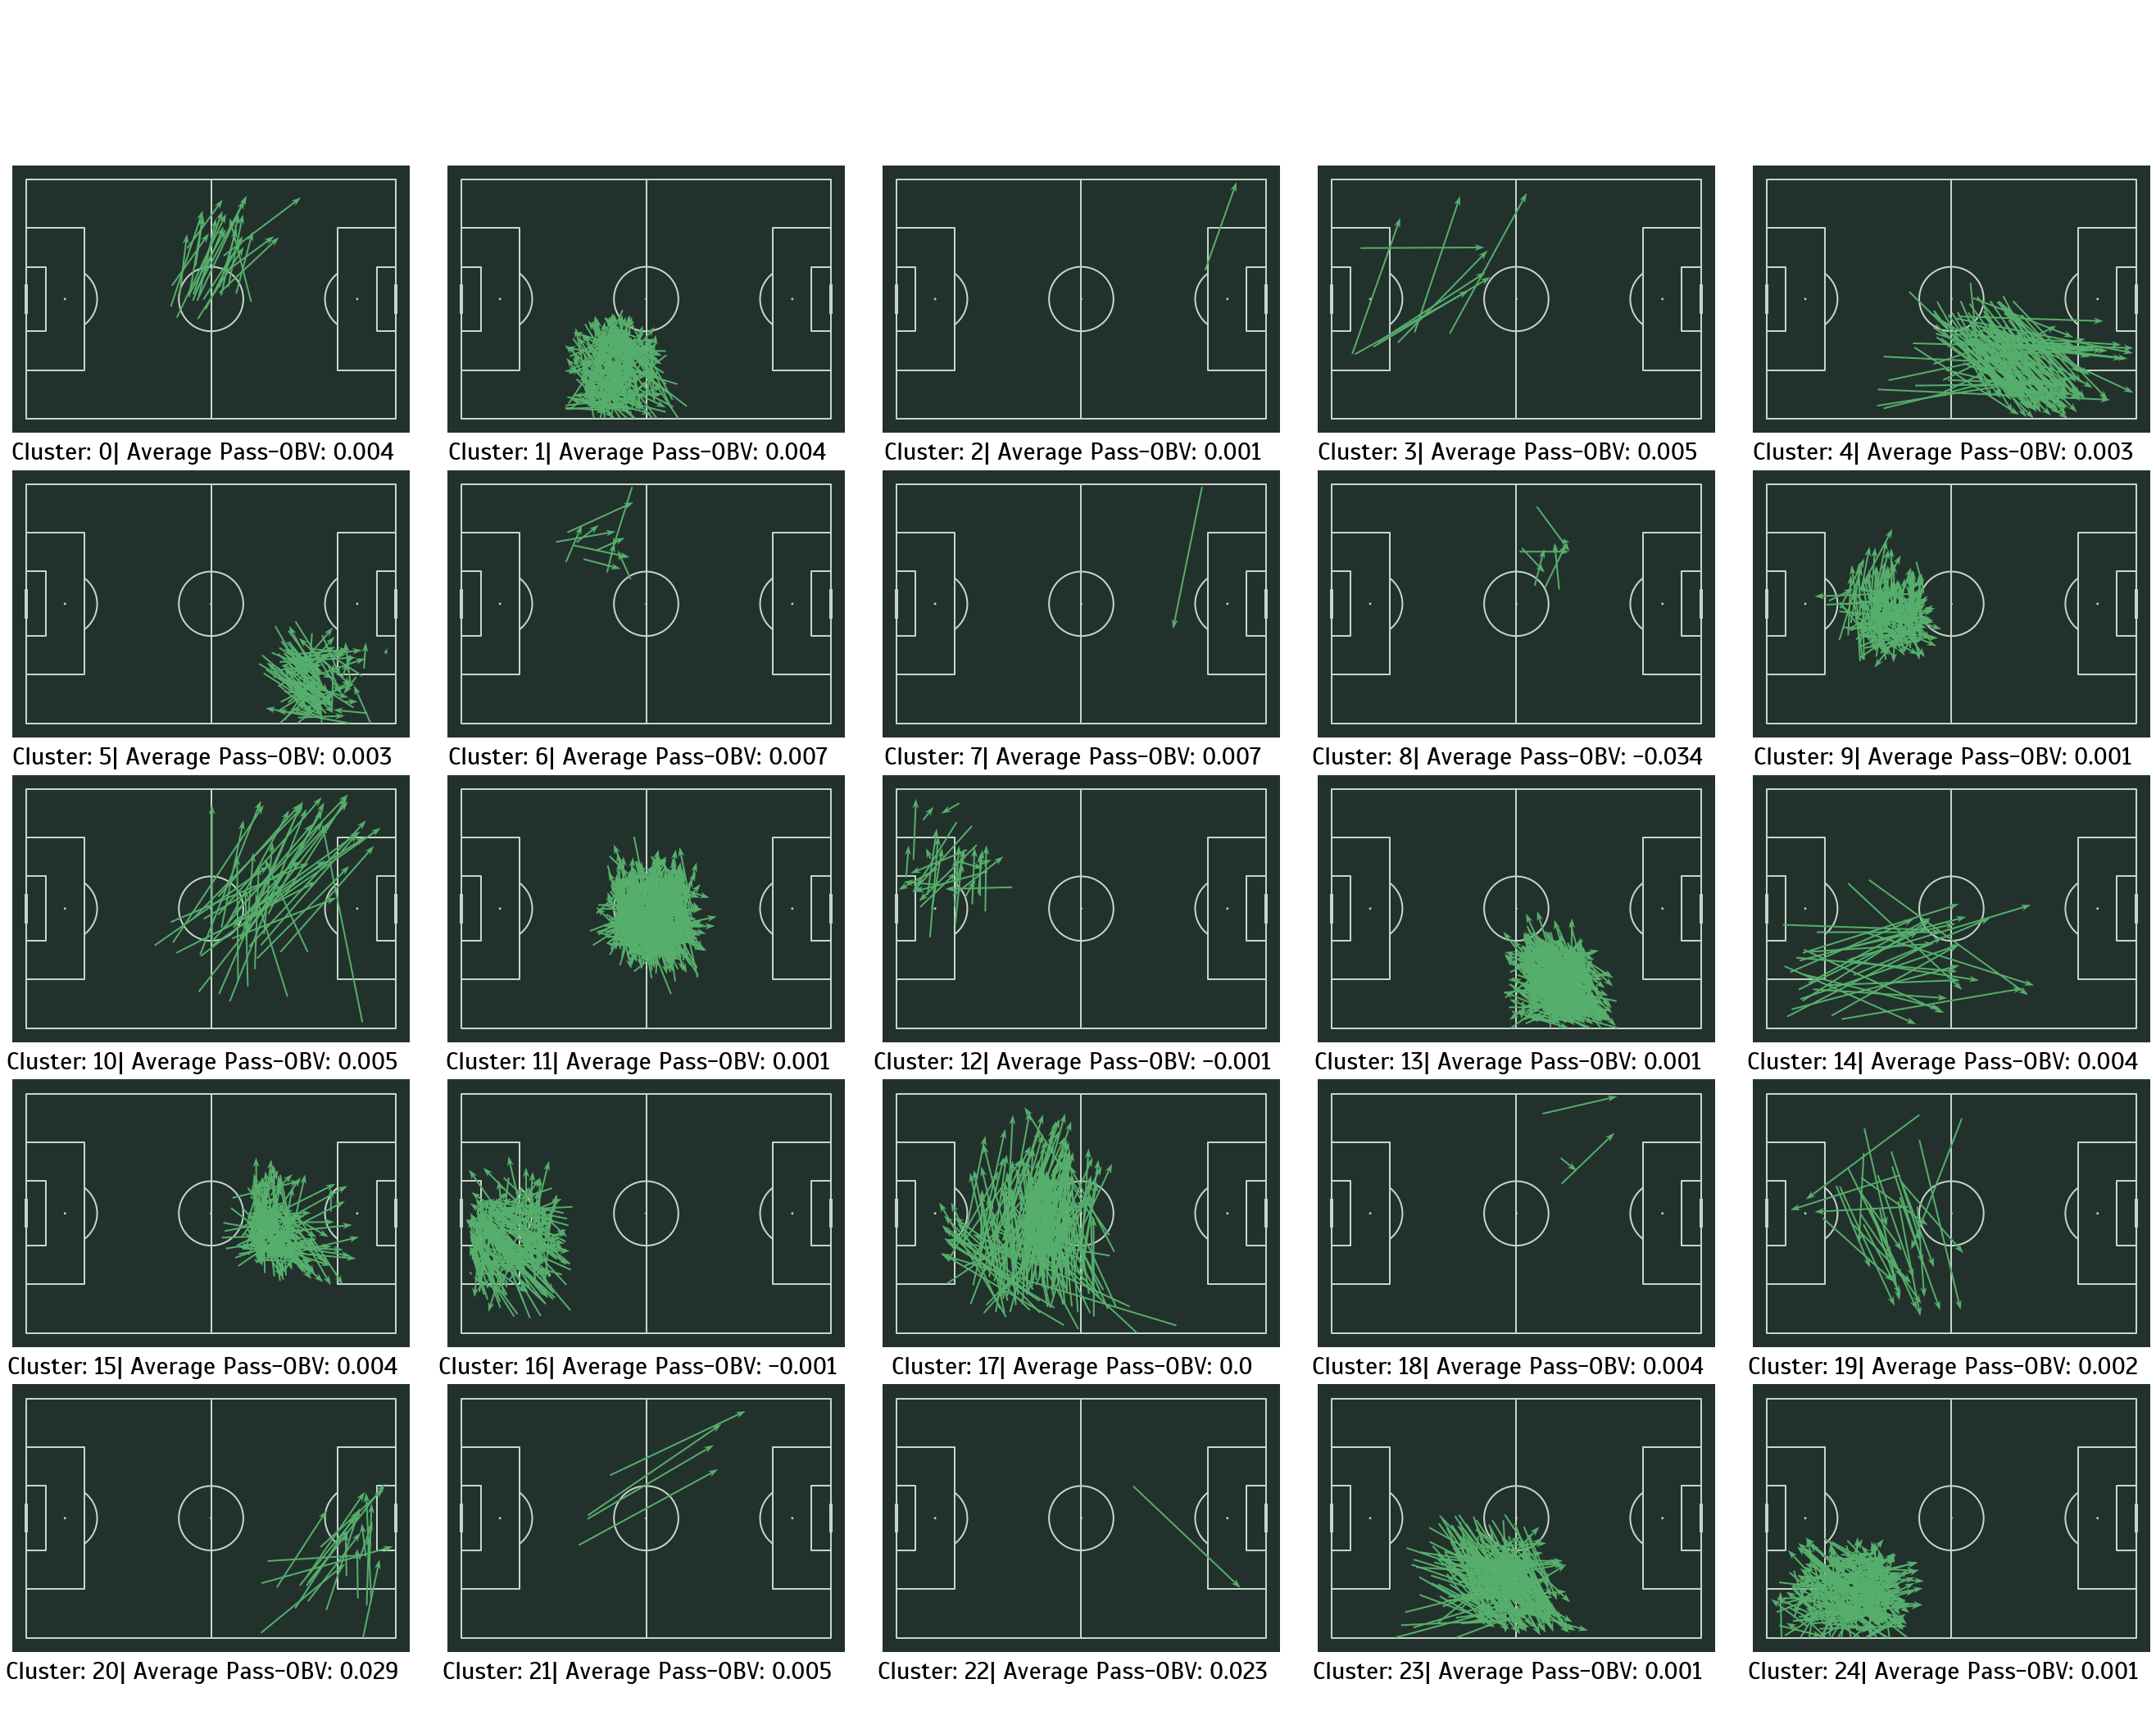

In [470]:
# filtering out some highlight_text warnings - the warnings aren't correct as the
Player='Mykola Matviyenko'
Action='Pass'

# a fontmanager object for using a google font
fm_scada = FontManager(('https://github.com/googlefonts/scada/blob/main/fonts/ttf/'
                        'Scada-Regular.ttf?raw=true'))

# text fits inside the axes.
import warnings

warnings.simplefilter("ignore", UserWarning)

# Setup the pitch
pitch = Pitch(pitch_type='uefa', pitch_color='#22312b', line_color='#c7d5cc',
                      half=False)

# plot the 5 * 3 grid
fig, axs = pitch.grid(nrows=5, ncols=5, figheight=30,
                      endnote_height=0.03, endnote_space=0,space=0.1,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_height=0.08, grid_height=0.84)

# cycle through the grid axes and plot the player pass maps
for idx, ax in enumerate(axs['pitch'].flat):
    
    # only plot the pass maps up to the total number of players
    
    # filter the complete/incomplete passes for each player (excudes throw-ins)


    player_pass = G5[(G5.clusters == idx) &
                    (G5.player == Player)].reset_index(drop=True)
    avg_obv_net=round(player_pass['obv_total_net'].mean(),3)
    
    complete_pass = player_pass[player_pass.type==Action].reset_index(drop=True)

    # plot the arrows
    pitch.arrows(complete_pass.Start_x, complete_pass.Start_y,
                 complete_pass.End_x, complete_pass.End_y,
                 color='#56ae6c', width=2, headwidth=4, headlength=6, ax=ax)

    annotation_string = (f'Cluster: {idx}| '
                         f'Average Pass-OBV: {avg_obv_net}')

    ax.text(50,-10, annotation_string, ha='center', va='center', size="30",c='black',
        fontproperties=fm_scada.prop)


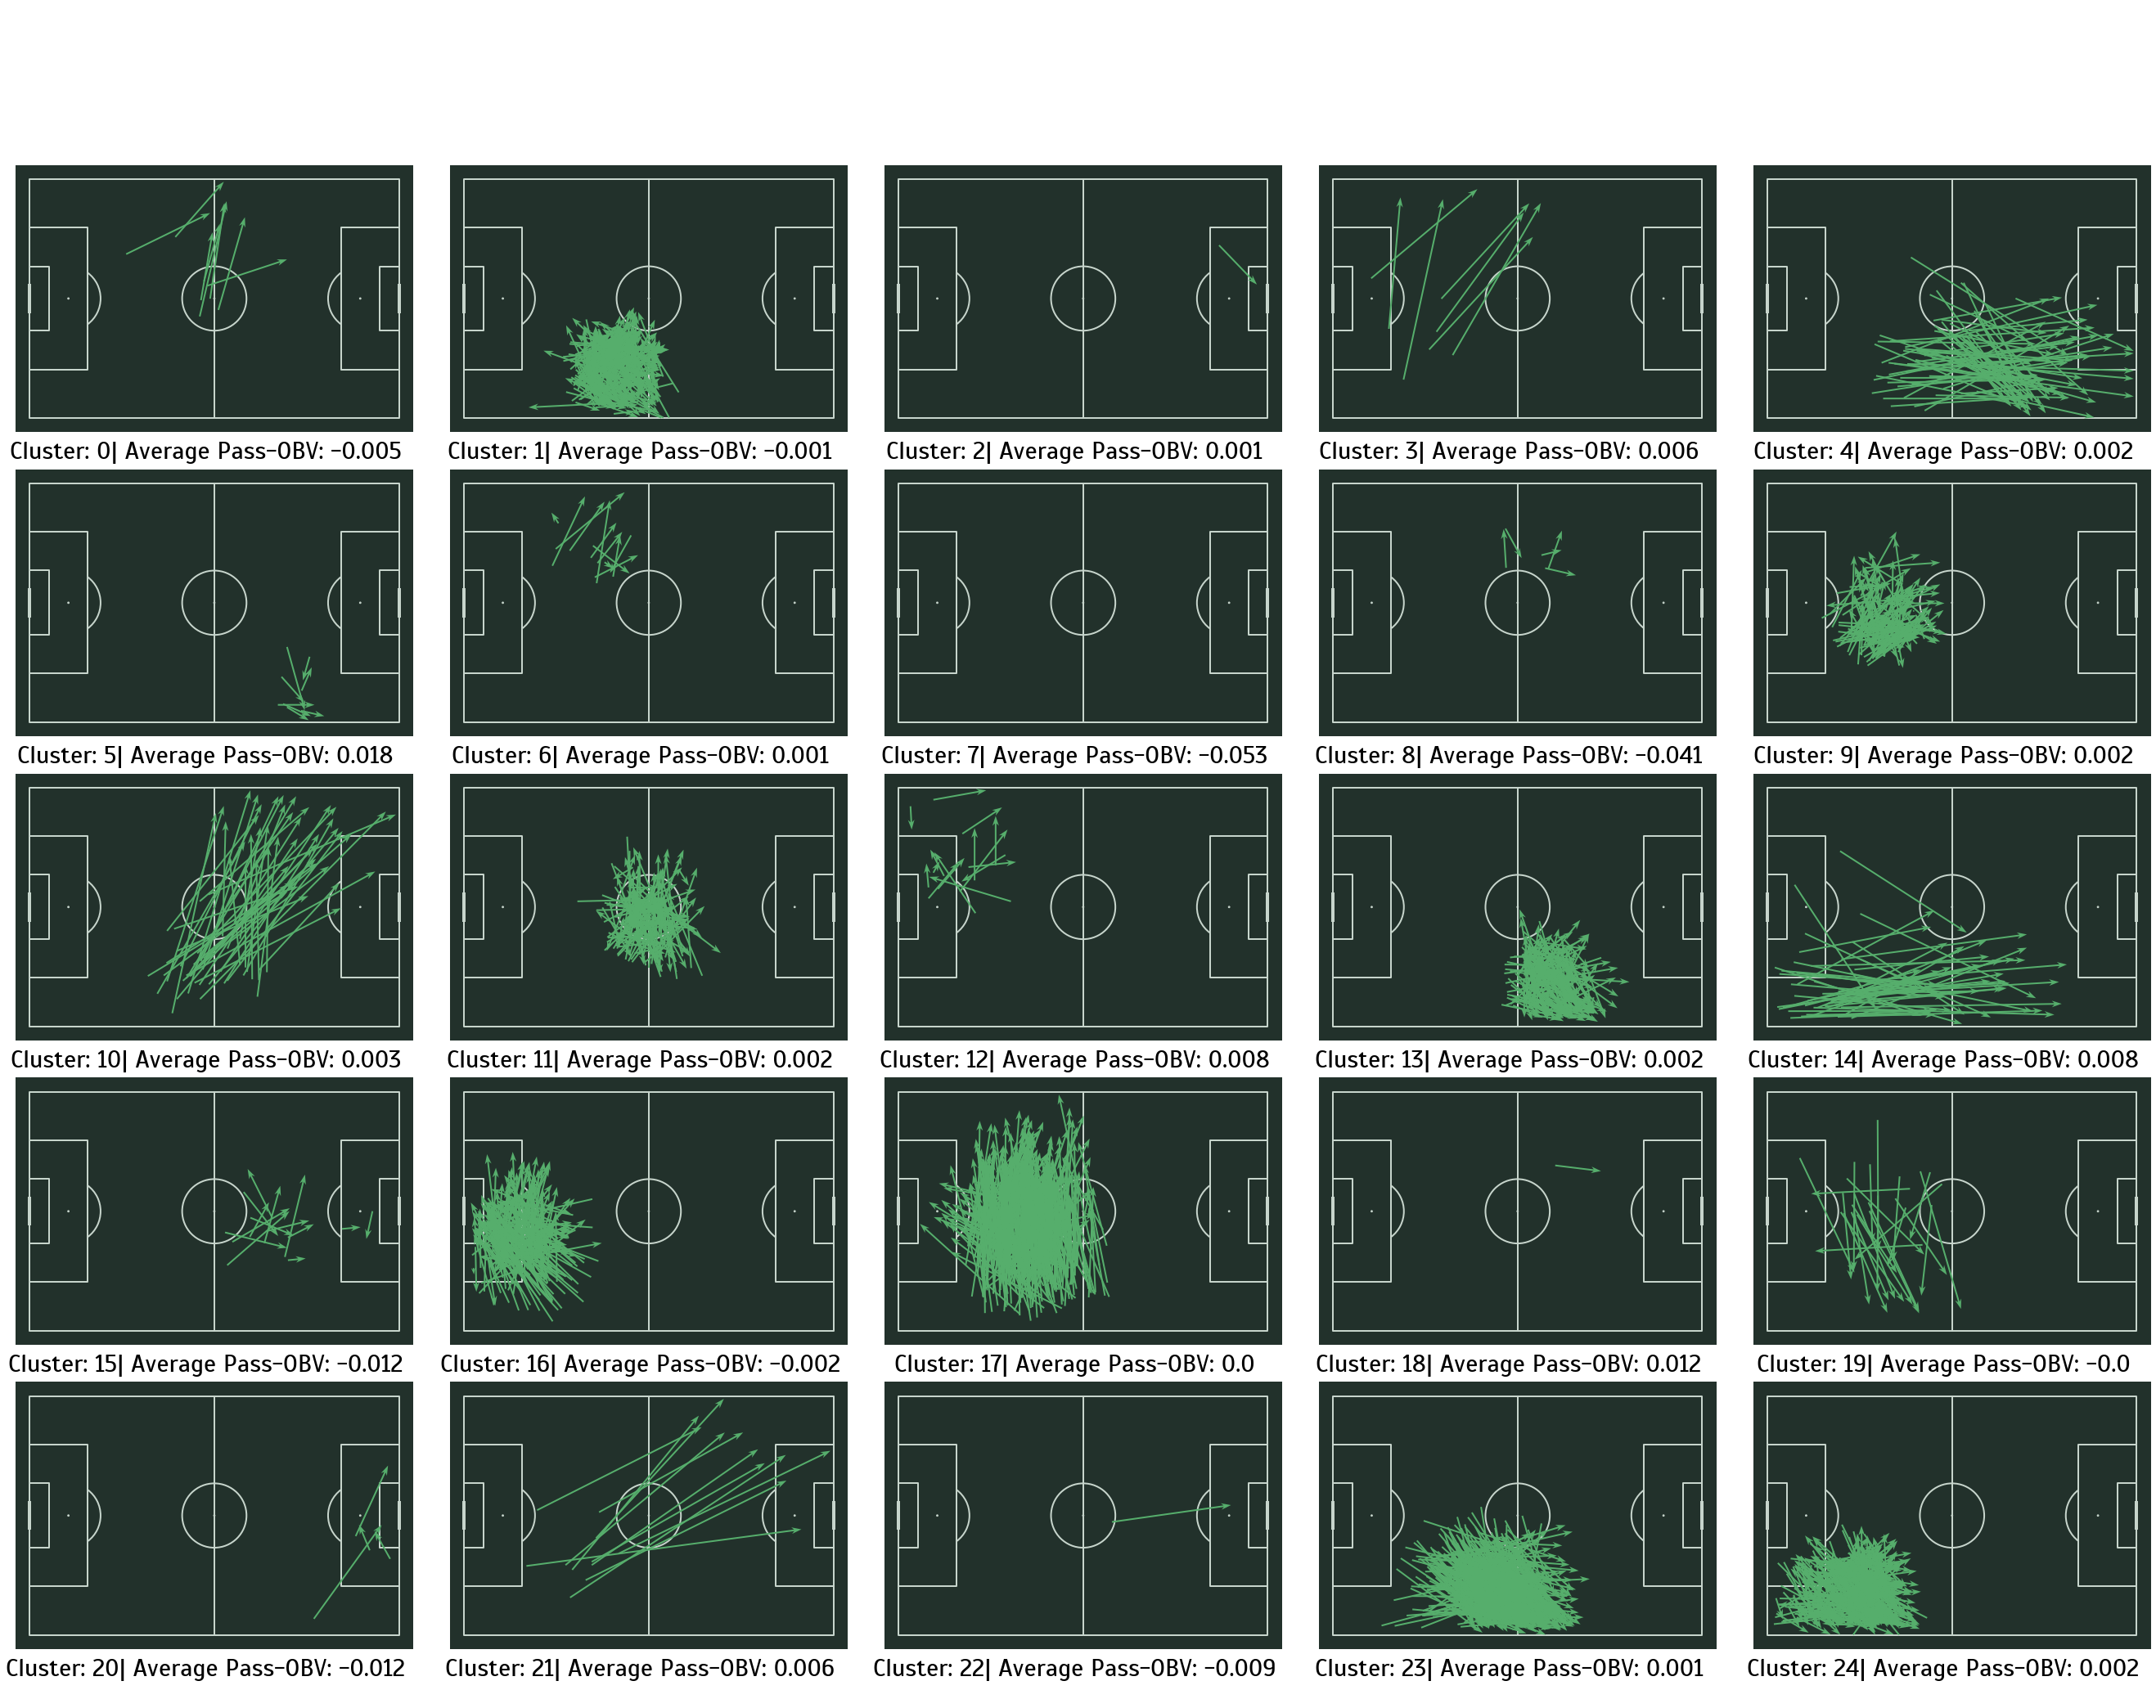

In [471]:
# filtering out some highlight_text warnings - the warnings aren't correct as the
Player='Nayef Aguerd'
Action='Pass'

# a fontmanager object for using a google font
fm_scada = FontManager(('https://github.com/googlefonts/scada/blob/main/fonts/ttf/'
                        'Scada-Regular.ttf?raw=true'))

# text fits inside the axes.
import warnings

warnings.simplefilter("ignore", UserWarning)

# Setup the pitch
pitch = Pitch(pitch_type='uefa', pitch_color='#22312b', line_color='#c7d5cc',
                      half=False)

# plot the 5 * 3 grid
fig, axs = pitch.grid(nrows=5, ncols=5, figheight=30,
                      endnote_height=0.03, endnote_space=0,space=0.1,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_height=0.08, grid_height=0.84)

# cycle through the grid axes and plot the player pass maps
for idx, ax in enumerate(axs['pitch'].flat):
    
    # only plot the pass maps up to the total number of players
    
    # filter the complete/incomplete passes for each player (excudes throw-ins)


    player_pass = G5[(G5.clusters == idx) &
                    (G5.player == Player)].reset_index(drop=True)
    avg_obv_net=round(player_pass['obv_total_net'].mean(),3)
    
    complete_pass = player_pass[player_pass.type==Action].reset_index(drop=True)

    # plot the arrows
    pitch.arrows(complete_pass.Start_x, complete_pass.Start_y,
                 complete_pass.End_x, complete_pass.End_y,
                 color='#56ae6c', width=2, headwidth=4, headlength=6, ax=ax)

    annotation_string = (f'Cluster: {idx}| '
                         f'Average Pass-OBV: {avg_obv_net}')

    ax.text(50,-10, annotation_string, ha='center', va='center', size="30",c='black',
        fontproperties=fm_scada.prop)


In [253]:
I=[]

for i in range(len(G)):
    
    G1=G[i].reset_index()
    action=G1.type.unique()
    I.append(action)    
I

[array(['Block'], dtype=object),
 array(['Clearance'], dtype=object),
 array(['Interception'], dtype=object),
 array(['Foul Committed'], dtype=object),
 array(['Duel'], dtype=object)]

In [51]:
# Importing the Rankings Info # Read all the csv files from one folder

path = '/Users/vignesh.jayanth/Documents/League Rankings' # use your path
all_files = glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['season']=filename
    li.append(df)

Rankings = pd.concat(li, axis=0, ignore_index=True)

Rankings['season'] = Rankings['season'].str.split('/').str[5]
Rankings['season'] = Rankings['season'].str.split('.csv').str[0]
Rankings['league'] = Rankings['season'].str.split('_').str[0]
Rankings['season'] = Rankings['season'].str.split('_').str[1]

col         = 'season'
conditions  = [Rankings[col] == '2020', Rankings[col] == '2021', Rankings[col] == '2019',Rankings[col] == '2018',Rankings[col] == '2017']
choices     = ["2020/2021", '2021/2022', '2019/2020','2018/2019','2017/2018']
    
Rankings["season"] = np.select(conditions, choices, default=np.nan)
Rankings=Rankings.rename(columns={'league':'League','season':'season_name','Team':'team'})
# Pick necessary columns #

def transform_dt(df):

    first = df.filter(regex='location')
    second = df.filter(regex='end_location')
    body_part=df.filter(regex='body_part')
    first=list(first.columns)[0]
    try:
        second=list(second.columns)[0]
    except (IndexError) as e:
        second=first

    body_part=list(body_part.columns)[0:1]

    df=df.sort_values(by=['match_id','index'], ascending=[True,True]).reset_index(drop=True)

    # Splitting the location column into different Start x, Start y and Start Z columns
    df[first] = df[first].fillna({i: [] for i in df.index})  # if the column is not strings
    
    if second=='shot_end_location':
        
        try:
            df[['Start_x','Start_y']] = pd.DataFrame(df[first].tolist(), index= df.index).fillna(0)
            
        except ValueError:
            
            df[['Start_x','Start_y','End_z']] = pd.DataFrame(df[first].tolist(), index= df.index).fillna(0)
            
        df[['End_x','End_y','End_z']] = pd.DataFrame(df[second].tolist(), index= df.index).fillna(0)
                
    else:
        
        df[['Start_x','Start_y']] = pd.DataFrame(df[first].tolist(), index= df.index).fillna(0)
        df[['End_x','End_y']] = pd.DataFrame(df[second].tolist(), index= df.index).fillna(0)
    
    df[second] = df[second].fillna({i: [] for i in df.index})  # if the column is not strings

    # Split the location rows in a list to dataframe #
    df[body_part]=df[body_part].fillna('None')
    
    df = df.drop([second,'50_50'], axis=1, errors='ignore')


    def convert_dim(df):
        df['Start_x']=df['Start_x']*0.868
        df['End_x']=df['End_x']*0.868
        df['Start_y']=df['Start_y']*0.84
        df['End_y']=df['End_y']*0.84

        return df

    df=convert_dim(df)

    #Assigning Proxy associated to x-axis (three Vertical zones)
    bins_x = [0,35,71,106]
    labels_x = ["Tiers-défensif","Tiers-Médian","Tiers-offensif"]
    df['x_zone_start']= pd.cut(df['Start_x'], bins=bins_x, labels=labels_x)
    df['x_zone_end']= pd.cut(df['End_x'], bins=bins_x, labels=labels_x)


    #Assigning Proxy associated to the defensive and offensive box
    col_1         = 'End_x'
    col_2         = 'End_y'
    col_3         = 'Start_x'
    col_4         = 'Start_y'

    conditions  = [(df[col_1] <= 18) & (df[col_1] >= 0.1) &(df[col_2] >= 14.34) & (df[col_2] <= 53.65),(df[col_1] >= 88) &(df[col_1] <= 106)& (df[col_2] >= 14.34) & (df[col_2] <= 53.65)]
    conditions1  = [(df[col_3] <= 18) & (df[col_3] >= 0.1) &(df[col_4] >= 14.34) & (df[col_4] <= 53.65),(df[col_3] >= 88) &(df[col_3] <= 106)& (df[col_4] >= 14.34) & (df[col_4] <= 53.65)]
    choices     = [ "Defensive-surface", 'Offensif-surface']

    df["into_box"] = np.select(conditions, choices, default='Open-Play')
    df["from_box"] = np.select(conditions1, choices, default='Open-Play')

    #Assigning Proxy associated to y-axis (5 horizontal corridors)
    bins_y = [0,14,25,43,54,68]
    labels_y = ["Gauche","Demi-espace Gauche","Centre","Demi-espace Droit","Droit"]
    df['y_zone_start']= pd.cut(df['Start_y'], bins=bins_y, labels=labels_y)
    df['y_zone_end']= pd.cut(df['End_y'], bins=bins_y, labels=labels_y)
    df['xy_zone_start'] = df[['x_zone_start', 'y_zone_start']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
    df['xy_zone_start'] = np.where(df['from_box']!='Open-Play',df['from_box'],df['xy_zone_start'])

    df['xy_zone_end'] = df[['x_zone_end', 'y_zone_end']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
    df['xy_zone_end'] = np.where(df['into_box']!='Open-Play',df['into_box'],df['xy_zone_end'])
    
    Positions = {"Central Midfielder": ['Right Center Midfield','Left Center Midfield',
                                    'Center Midfield'],
             "Attacking Midfielder":['Center Attacking Midfield','Right Attacking Midfield', 
                                     'Left Attacking Midfield'],
            "Center Back":['Right Center Back','Left Center Back','Center Back'],
             "Winger":['Left Wing', 'Right Wing','Left Midfield','Right Midfield'],
             "Forward":['Left Center Forward','Center Forward','Right Center Forward'],
             "Right Full Back":['Right Back','Right Wing Back'],
             "Left Full Back":['Left Back','Left Wing Back'],
             "Defensive Midfielder":['Center Defensive Midfield','Left Defensive Midfield','Right Defensive Midfield'],
             'Goalkeeper':['Goalkeeper']}

    pos=pd.DataFrame(pd.concat({k: pd.Series(v) for k, v in Positions.items()})).reset_index().set_axis(['position_group', 'NA', 'position'], axis=1, inplace=False)
    del pos['NA']

    df=pd.merge(df,pos,on='position',how='left')
    
    return df

def kmeans(df,cluster_name,n):
    
    x=df
    
    #kmeans = KMeans(n_clusters= 25, random_state= 0)
    kmeans = MiniBatchKMeans(n_clusters= n, random_state= 0)
    #kmeans = GaussianMixture(n_components= 30, random_state= 0)

    # Fitting the input data
    kmeans = kmeans.fit(x)
    # Getting the cluster £labels
    df['clusters']=kmeans.predict(x)

    df=df[['clusters']].reset_index()
    
    df = df.rename(columns={'clusters': cluster_name})
    
    return df


def defensive_action(df):
    
    keep_variables=['player_id','match_id','position','player','season_name','team','type','competition_name',
                    'xy_zone_start','xy_zone_end']

    cols = list(df.filter(regex='duration|obv|Start|End|press|block|clearance|interception|clear|pressure|committed|past|recovery|dispossessed|50|duel|position_group').columns)

    del_cols = list(df.filter(regex='id|recipient|frame').columns)
    
    pass_list = list(set(cols) - set(del_cols))+ list(set(keep_variables))

    keep_df=df[pass_list].reset_index(drop=True)

  # Get list of all columns that need converting from binary columns #
    binary_cols = list(keep_df.columns[keep_df.isin([None,True]).all()])
    
    bool_dict= {
       True: 1,
       None: 0
    }

    for column in binary_cols:
        keep_df[column] = keep_df[column].map(bool_dict)

    num_cols = keep_df._get_numeric_data().columns

    keep_df=keep_df.set_index(keep_variables)

    remaining_cols=list(set(keep_df.columns)-set(num_cols))

    for i in remaining_cols:

        keep_df=pd.get_dummies(data=keep_df, columns=[i])

    keep_df.columns = keep_df.columns.str.replace(' ', '_')

    return keep_df    


def attack_action(df):
    
    keep_variables=['player_id','match_id','position','player','season_name','team','type','competition_name',
                    'xy_zone_start','xy_zone_end']

    cols = list(df.filter(regex='duration|obv|pass|Start|End|pressure|carry|dribble|shot|xg|position_group').columns)

    del_cols = list(df.filter(regex='id|recipient|frame').columns)

    pass_list = list(set(cols) - set(del_cols))+ list(set(keep_variables))

    keep_df=df[pass_list].reset_index(drop=True)

    # Get list of all columns that need converting from binary columns #
    binary_cols = list(keep_df.columns[keep_df.isin([None,True]).all()])
    bool_dict= {
       True: 1,
       None: 0
    }

    for column in binary_cols:
        keep_df[column] = keep_df[column].map(bool_dict)

    num_cols = keep_df._get_numeric_data().columns

    keep_df=keep_df.set_index(keep_variables)

    remaining_cols=list(set(keep_df.columns)-set(num_cols))
    
    first = keep_df.filter(regex='type')
    
    try:
        set_pieces=['Free Kick', 'Goal Kick', 'Throw-in','Corner']
        keep_df=keep_df[~keep_df[first].isin(set_pieces)]
    except (ValueError):
        pass

    for i in remaining_cols:

        keep_df=pd.get_dummies(data=keep_df, columns=[i])

    keep_df.columns = keep_df.columns.str.replace(' ', '_')

    return keep_df




In [137]:
check_remaining=tech_info[(tech_info['Player_SB'].str.contains("Jasmin Čeliković")) & 
               (tech_info['Season']>='2020')][['Team','Season','Player_SB','player_id']]
check = check_remaining.groupby(['Player_SB','Team','Season','player_id']).size().reset_index(name='Freq')
check

Player_SB   Team     Season  player_id  Freq
0  Jasmin Čeliković  Sereď  2020/2021      37183     1

In [135]:
remaining=list(set(players_cb)-set(players_check))
remaining

# Check if
    
all_check_indices=list(itertools.chain(*D))
list_check=[i.split('/', 6)[6] for i in all_check_indices]
list_check=[i.split('.ftr', 1)[0] for i in list_check]

difference=list(set(list_check)-set(All_seasons))
difference

['Jasmin Čeliković']